In [1]:
import pandas as pd

dataframe = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
dataframe

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [2]:
label_column_name = 'variety'
str_to_num_label_list = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
num_to_str_label_list = {}

for str_, num in str_to_num_label_list.items():
  num_to_str_label_list[num] = str_
  dataframe[label_column_name] = dataframe[label_column_name].replace(str_, num)

dataframe

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
X = dataframe.drop(label_column_name, axis=1).values
y = dataframe[label_column_name].values

X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [4]:
import torch
import torch.nn as nn

class Model(nn.Module):
  def __init__(self, input, hidden1, hidden2, output):
    super().__init__()
    self.fc = nn.Sequential(
        nn.Linear(in_features = input, out_features = hidden1, bias = True),
        nn.ReLU(),
        nn.Linear(in_features = hidden1, out_features = hidden2, bias = True),
        nn.ReLU(),
        nn.Linear(in_features = hidden2, out_features = output, bias = True)
        # we dont need a softmax layer as we are using cross entropy which
        # does softmax internally.
        # nn.Softmax()
        )

  def forward(self, x):
    return self.fc(x)

In [5]:
RANDOM_SEED = 41

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=RANDOM_SEED)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [7]:
# set seed for random weight initialization to the model
torch.manual_seed(RANDOM_SEED)

model = Model(4, 8, 8, 3)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [8]:
training_loss_list = []
testing_loss_list = []

for i in range(100):
  # set model to training mode. this is ensures that batch-norm and
  # drop-out behave accordingly during training
  model.train()

  # the whole training set is being considered as one batch
  y_pred = model(X_train)
  training_loss = criterion(y_pred, y_train)
  training_loss_list.append(training_loss.item())

  # gradients of all model-weights are accummulated each step for
  # batch processing. we need put it to zero before back-prop. Or,
  # gradient from previous batch will get added to current batch.
  optimizer.zero_grad()
  training_loss.backward()
  optimizer.step()

  # swith to evaluation mode
  model.eval()

  # turn off gradient calculation
  with torch.no_grad():
    y_eval = model(X_test)
    testing_loss = criterion(y_eval, y_test)
    testing_loss_list.append(testing_loss.item())


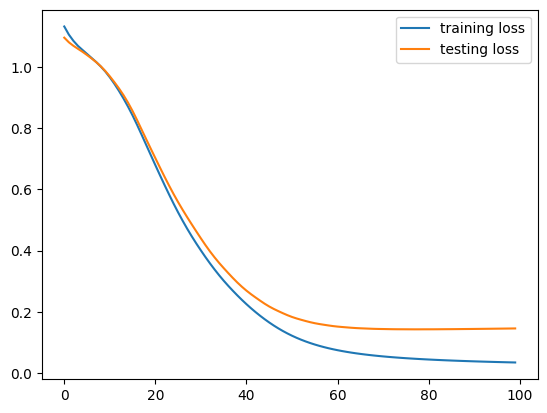

In [12]:
import matplotlib.pyplot as plt

plt.plot(training_loss_list, label = 'training loss')
plt.plot(testing_loss_list, label = 'testing loss')
plt.legend()

In [10]:
# swith to evaluation mode
model.eval()

# turn off gradient calculation
with torch.no_grad():
  y_eval = model(X_test)

_, eval = torch.max(y_eval, dim=1)
number_of_correct_predictions = (eval == y_test).sum().item()
total_number_of_predictions = len(y_test)
print(f'accuracy: {number_of_correct_predictions/total_number_of_predictions}')

accuracy: 0.9666666666666667
